In [1]:
import numpy as np
from datetime import datetime as dt,timedelta
import xarray as xr
from lib import driver
from lib import dataset
import netCDF4 as nc
import matplotlib.pyplot as plt
from lib.tools import *

In [2]:
ds = xr.open_dataset('/home/ycheng/LIM/CPC/run_code/data_clim/cpcmask.nc')

/home/ycheng/.conda/envs/cpc/lib/python3.10/site-packages/xarray/plot/dataarray_plot.py:2130: UserWarning: The following kwargs were not used by contour: 'projection'
  primitive = ax.contourf(x, y, z, **kwargs)


<xarray.DataArray 'mask1' ()>
array(-15787)
<xarray.DataArray 'mask1' ()>
array(15786)
(89, 181)
<xarray.DataArray 'mask1' ()>
array(323)
<xarray.DataArray 'lon' (lon: 181)>
array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,  22.,
        24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,  44.,  46.,
        48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,  66.,  68.,  70.,
        72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,  88.,  90.,  92.,  94.,
        96.,  98., 100., 102., 104., 106., 108., 110., 112., 114., 116., 118.,
       120., 122., 124., 126., 128., 130., 132., 134., 136., 138., 140., 142.,
       144., 146., 148., 150., 152., 154., 156., 158., 160., 162., 164., 166.,
       168., 170., 172., 174., 176., 178., 180., 182., 184., 186., 188., 190.,
       192., 194., 196., 198., 200., 202., 204., 206., 208., 210., 212., 214.,
       216., 218., 220., 222., 224., 226., 228., 230., 232., 234., 236., 238.,
       240., 242., 244., 246., 248.,

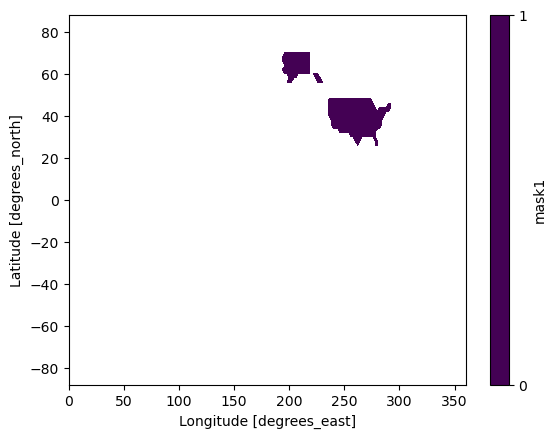

In [32]:
ds['mask1']
from cartopy import crs as ccrs
contour_levels = np.arange(0,1.5,1)
fig, ax = plt.subplots()
ds.mask1.plot.contourf(ax=ax, levels=contour_levels, projection=ccrs.PlateCarree())
# print(ds.mask1[np.where(~np.isnan(ds.mask1))])
count_nan = ~np.isnan(ds.mask1).sum()
print(count_nan)
count_nan = np.isnan(ds.mask1).sum()
print(count_nan)
print(ds.mask1.shape)
print(ds.mask1.count())
print(ds.lon)
print(ds.lat)

In [68]:
def interp(lats,lons,new_lats,new_lons,data_daily):
    from scipy.interpolate import RegularGridInterpolator
    new_lons,new_lats = np.meshgrid(new_lons,new_lats)
    # print(lats)
    # print(lons)
    interp_interior = RegularGridInterpolator((lats,lons),data_daily,bounds_error=False)
    # I set bounds_error=False because whenever the points are out of bounds, I don't need them anway (poles)
    out = interp_interior((new_lats,new_lons))
    return out

In [66]:
new_lats = np.arange(90,-91,-2)
new_lons = np.arange(0,360,2)
lat_original = ds.lat.values
lon_original = ds.lon.values
# print(lat_original)
# print(new_lats)
# print(lon_original)
# print(new_lons)
data = ds.mask1.data
# print(type(data))
print(data.shape)
newdata = interp(lat_original, lon_original, new_lats, new_lons, data)
# lonres = abs(statistics.mode(np.gradient(ds['lon'].data)[1].flatten()))
print(newdata.shape)

(89, 181)
(91, 180)


In [71]:
mask = xr.DataArray(newdata,
                           dims=("lat", "lon"),
                           coords={"lat": new_lats,
                                   "lon": new_lons},
                           name="mask_conus",
                           )





/home/ycheng/.conda/envs/cpc/lib/python3.10/site-packages/xarray/plot/dataarray_plot.py:2130: UserWarning: The following kwargs were not used by contour: 'projection'
  primitive = ax.contourf(x, y, z, **kwargs)


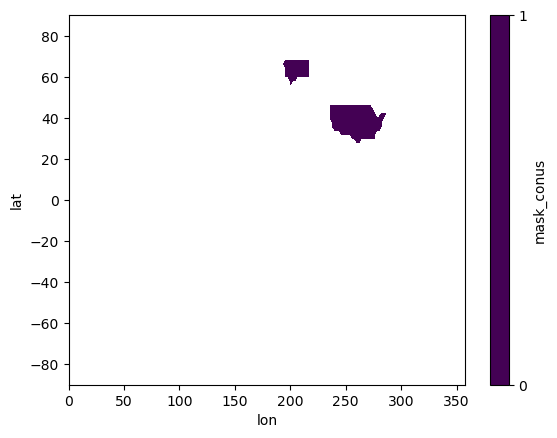

In [72]:
contour_levels = np.arange(0,1.5,1)
fig, ax = plt.subplots()
mask.plot.contourf(ax=ax, levels=contour_levels, projection=ccrs.PlateCarree())

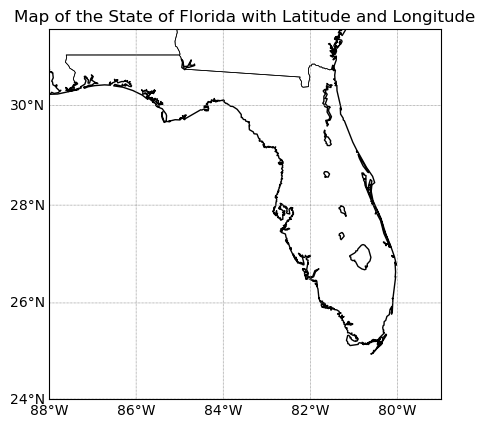

In [80]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Create a Basemap instance for plotting
m = Basemap(projection='merc', llcrnrlat=24.0, urcrnrlat=31.5,
            llcrnrlon=-88.0, urcrnrlon=-79.0, resolution='i')

# Draw coastlines, state boundaries, and countries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# Draw the boundary of the state of Florida
# florida_boundary = {
#     "type": "Polygon",
#     "coordinates": [[
#         [-87.634938, 24.396308],
#         [-87.634938, 31.000000],
#         [-79.974307, 31.000000],
#         [-79.974307, 24.396308],
#         [-87.634938, 24.396308]
#     ]]
# }

# m.readshapefile(florida_boundary, 'florida_boundary', drawbounds=True, linewidth=2, color='blue')

# Draw latitude and longitude gridlines
m.drawparallels(range(20, 32, 2), labels=[1,0,0,0], linewidth=0.5, color='gray')
m.drawmeridians(range(-90, -78, 2), labels=[0,0,0,1], linewidth=0.5, color='gray')

# Add title
plt.title('Map of the State of Florida with Latitude and Longitude')

# Show the plot
plt.show()
